---
title: Applying Machine Learning and Deep Learning Methods
format:
    html:
        embed-resources: true
        toc: true
---


# Overview

We will be using some machine learning (SVMs) and deep learning methods to compare their performance to our statistical models.

** Add summary of other models here **

# Load Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Load the data
df = pd.read_csv("../data/academic-success.csv", sep=";")

# Print shape
print(df.shape)

# View
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


The data has 37 features, all numeric with the exception of the target variable which has 3 classes: `Graduate`, `Dropout`, and `Enrolled`.

## Normalization

In [33]:
# Normalize the data

# Pull out the target variable
y=df["Target"]

# Pull out the features
X=df.drop("Target", axis=1)

# Normalize the data
X=(X-X.mean())/X.std()

# Put data back together
df=pd.concat([X,y], axis=1)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,Graduate
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,Graduate
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,Graduate


/Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


/Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


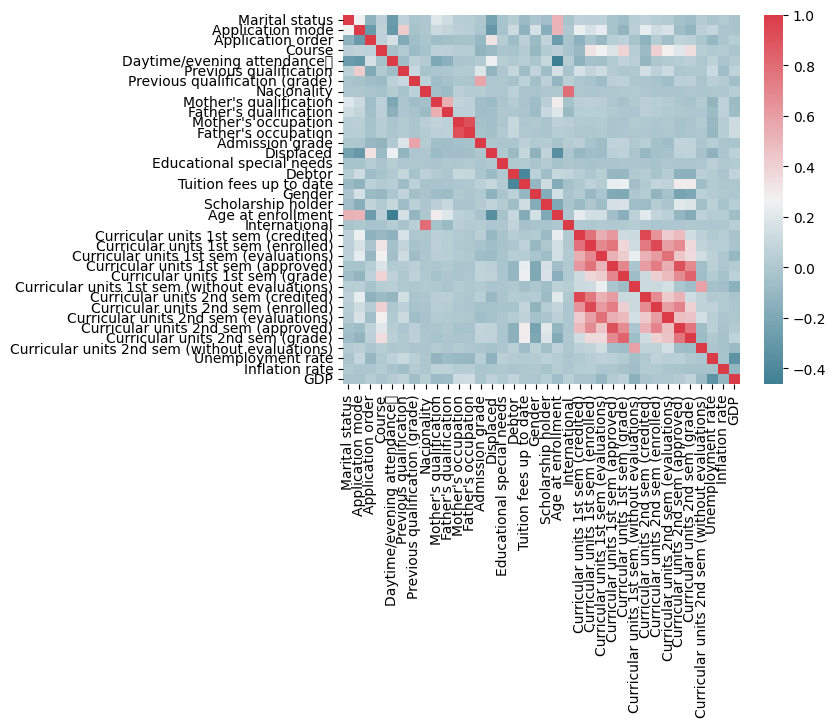

In [34]:
# Create correlation matrix
corr = X.corr()

# Plot heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=False)
plt.show()

In [35]:
# Print data types
print(df.dtypes)

Marital status                                    float64
Application mode                                  float64
Application order                                 float64
Course                                            float64
Daytime/evening attendance\t                      float64
Previous qualification                            float64
Previous qualification (grade)                    float64
Nacionality                                       float64
Mother's qualification                            float64
Father's qualification                            float64
Mother's occupation                               float64
Father's occupation                               float64
Admission grade                                   float64
Displaced                                         float64
Educational special needs                         float64
Debtor                                            float64
Tuition fees up to date                           float64
Gender        

In [36]:
# Count na values
print(df.isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [37]:
# Drop enrolled rows for classification
df=df[df["Target"]!="Enrolled"]

We drop enrolled rows for classification to focus on predicting students *final* status. This means we do not want to see students who could still dropout.

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop(columns=["Target"])
y = df["Target"]

# Encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# Print encoded value conversion
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Create train and test sets 0.8 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

{'Dropout': 0, 'Graduate': 1}


In [39]:
# Print the shapes
print(X_train.shape, y_train.shape)

(2904, 36) (2904,)


In [40]:
# Get target value counts
pd.Series(y).value_counts()

1    2209
0    1421
Name: count, dtype: int64

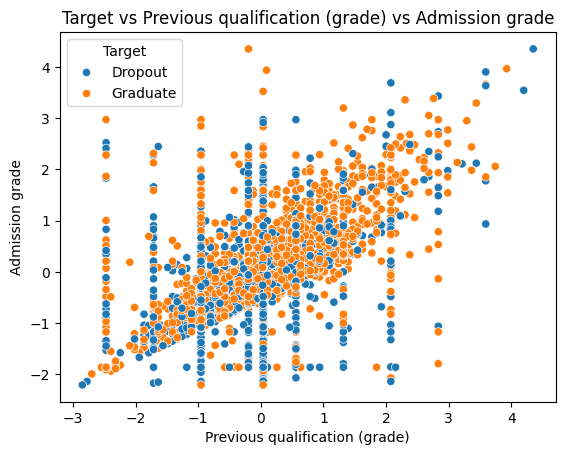

In [41]:
# Plot admission graden vs age 
sns.scatterplot(x="Previous qualification (grade)", y="Admission grade", hue="Target", data=df)
plt.title("Target vs Previous qualification (grade) vs Admission grade")
plt.show() 

The data is clearly quite messy, with no obvious linear separation of the target. Using highly complex models like deep learning may be necessary to capture the underlying patterns.

# Classification

## Deep Learning

### Build Model

We will be using a simple feedforward neural network with 2 hidden layers.

In [42]:

from keras.models import Sequential
from keras.layers import Dense

# Hyperparameters
regularization = 0.01
learning_rate = 0.001

# Create the model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(36,), kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(16, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(8, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(4, activation="relu", kernel_regularizer=kr.regularizers.l2(regularization)))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer=kr.optimizers.Adam(learning_rate=learning_rate),
              loss=kr.losses.BinaryCrossentropy(),
              metrics=[kr.metrics.BinaryAccuracy()])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                1184      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Create Early Stopping
early_stopping = kr.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100


2024-04-07 16:28:50.419535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 5s 42ms/step - loss: 1.1294 - binary_accuracy: 0.7672
Epoch 2/100
91/91 [==============================] - 3s 37ms/step - loss: 0.8114 - binary_accuracy: 0.8691
Epoch 3/100
91/91 [==============================] - 3s 37ms/step - loss: 0.6585 - binary_accuracy: 0.8822
Epoch 4/100
91/91 [==============================] - 3s 37ms/step - loss: 0.5525 - binary_accuracy: 0.9012
Epoch 5/100
91/91 [==============================] - 3s 37ms/step - loss: 0.4856 - binary_accuracy: 0.9070
Epoch 6/100
91/91 [==============================] - 3s 37ms/step - loss: 0.4394 - binary_accuracy: 0.9091
Epoch 7/100
91/91 [==============================] - 3s 36ms/step - loss: 0.4027 - binary_accuracy: 0.9098
Epoch 8/100
91/91 [==============================] - 3s 36ms/step - loss: 0.3803 - binary_accuracy: 0.9077
Epoch 9/100
91/91 [==============================] - 3s 35ms/step - loss: 0.3610 - binary_accuracy: 0.9091
Epoch 10/100
91/91 [=============================

In [44]:
# Evaluate the model
model.evaluate(X_test, y_test)

# Predict
y_pred = model.predict(X_test)

# Convert the predictions to binary
y_pred = np.where(y_pred > 0.5, 1, 0)

# Print the classification report
from sklearn.metrics import classification_report
nn_report = classification_report(y_test, y_pred)
print(nn_report)

 1/23 [>.............................] - ETA: 6s - loss: 0.2052 - binary_accuracy: 0.9375

2024-04-07 16:32:54.810923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       290
           1       0.90      0.96      0.93       436

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



2024-04-07 16:32:55.755729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


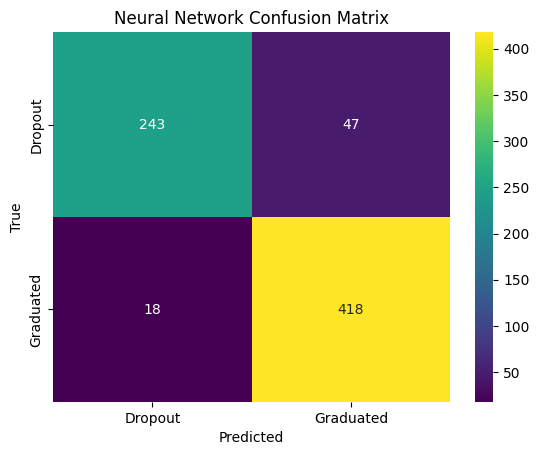

In [45]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Neural Network Confusion Matrix')
plt.show()

## SVM

In [46]:
# Create svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Hyperparameters
c_vals = [0.1, 1, 10, 100]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for k in tqdm(kernel):
    for c in c_vals:
        svc = SVC(C=c, kernel=k)
        svc.fit(X_train, y_train)
        error = np.mean((y_test - svc.predict(X_test))**2)
        errors.append(error)
        if error < best_error:
            best_error = error
            best_params = (c, k)

# Print best params
print(f"Best params: {best_params}")


100%|██████████| 3/3 [00:07<00:00,  2.64s/it]

Best params: (1, 'linear')


In [47]:
# Create the model using best params
svc = SVC(C=best_params[0], kernel=best_params[1])

# Fit the model
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Print the classification report
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       290
           1       0.89      0.97      0.93       436

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



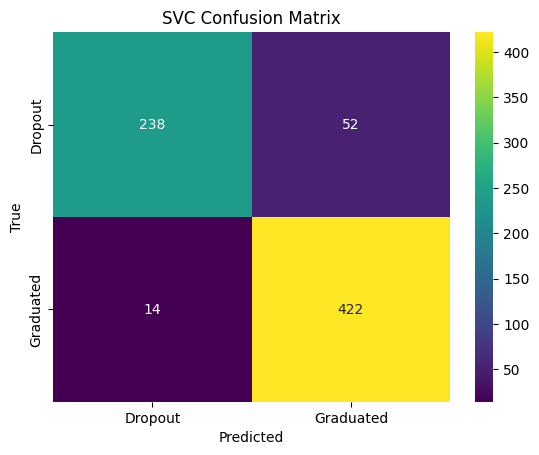

In [48]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

# Convert the target back to the original classes
plt.xticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.yticks(ticks=[0.5,1.5], labels=["Dropout", "Graduated"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.show()

## Comparison

In [49]:
print("NEURAL NETWORK\n", nn_report, "\n")
print("SVM\n", svm_report, "\n")

NEURAL NETWORK
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       290
           1       0.90      0.96      0.93       436

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726
 

SVM
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       290
           1       0.89      0.97      0.93       436

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726
 



The models both finish with 91% accuracy, which is quite good. The deep learning model has better precision, while the SVM has better recall. These differences are comparable, resulting in the same F1 score for both models. It is extremely difficult to say which model is better, as they are both quite good.

# Regression

In [8]:
# Reread the data
df = pd.read_csv("../data/academic-success.csv", sep=";")


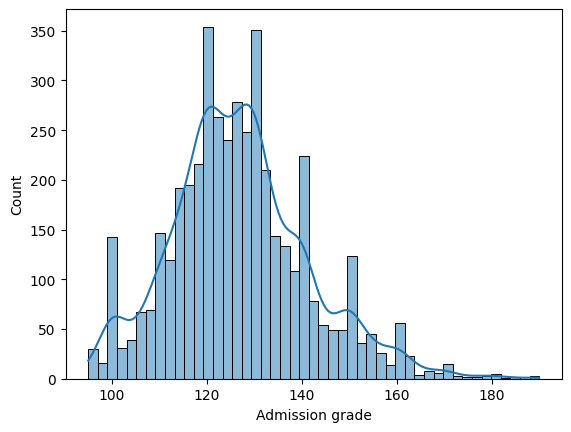

In [9]:
# Plot grade distribution
sns.histplot(df["Admission grade"], kde=True)
plt.show()

Very normal distribution of the target variable.

In [10]:
# Normalize the data

# Pull out the target variable since it's categorical
y=df["Target"]

# Pull out the features
X=df.drop("Target", axis=1)

# Normalize the data
X=(X-X.mean())/X.std()

# Put data back together
df=pd.concat([X,y], axis=1)

# Convert 'Target' to 'Status'
df["Status"] = df["Target"]
df = df.drop(columns=["Target"])

# Make the 'Status' column categorical
df["Status"] = pd.Categorical(df["Status"])

# Encode the 'Status' column
df["Status"] = df["Status"].cat.codes

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Status
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,2
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,2
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,2


In [11]:
from sklearn.model_selection import train_test_split

# Target is Admission grade
X = df.drop(columns=["Admission grade"])
y = df["Admission grade"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes
print(X_train.shape, y_train.shape)

(3539, 36) (3539,)


In [12]:
# Hyperparameters
learning_rate = 0.001
reg_rate = 0.01

# Create the model for regression
model = Sequential()
model.add(
    Dense(
        32,
        activation="relu",
        input_shape=(36,),
        kernel_regularizer=kr.regularizers.l2(reg_rate),
    )
)
model.add(
    Dense(16, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate))
)
model.add(
    Dense(8, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate))
)
model.add(
    Dense(4, activation="relu", kernel_regularizer=kr.regularizers.l2(reg_rate))
)
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(
    optimizer=kr.optimizers.Adam(learning_rate=learning_rate),
    loss=kr.losses.MeanSquaredError(),
    metrics=[kr.metrics.MeanSquaredError()],
)

model.summary()

2024-04-07 15:18:59.331006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-07 15:18:59.331256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1184      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Define Early Stopping
early_stopping = kr.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[early_stopping])

Epoch 1/200


2024-04-07 15:19:00.306401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 5s 36ms/step - loss: 2.3644 - mean_squared_error: 1.6614
Epoch 2/200
111/111 [==============================] - 4s 34ms/step - loss: 1.4755 - mean_squared_error: 0.7996
Epoch 3/200
111/111 [==============================] - 4s 33ms/step - loss: 1.3161 - mean_squared_error: 0.6726
Epoch 4/200
111/111 [==============================] - 4s 34ms/step - loss: 1.2490 - mean_squared_error: 0.6366
Epoch 5/200
111/111 [==============================] - 4s 33ms/step - loss: 1.2163 - mean_squared_error: 0.6282
Epoch 6/200
111/111 [==============================] - 4s 33ms/step - loss: 1.1996 - mean_squared_error: 0.6265
Epoch 7/200
111/111 [==============================] - 4s 33ms/step - loss: 1.2084 - mean_squared_error: 0.6336
Epoch 8/200
111/111 [==============================] - 4s 34ms/step - loss: 1.2385 - mean_squared_error: 0.6424
Epoch 9/200
111/111 [==============================] - 4s 33ms/step - loss: 1.2998 - mean_squared_error: 0.6468
Epoc

In [14]:
# Evaluate the model
model.evaluate(X_test, y_test)

 3/28 [==>...........................] - ETA: 0s - loss: 1.4381 - mean_squared_error: 0.8639

2024-04-07 15:20:00.606075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 30ms/step - loss: 1.2587 - mean_squared_error: 0.6845


[1.258729338645935, 0.6844558119773865]

 64/111 [================>.............] - ETA: 0s

2024-04-07 15:20:01.622451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 0s 3ms/step
Train Mean Squared Error: 0.6222813150185452


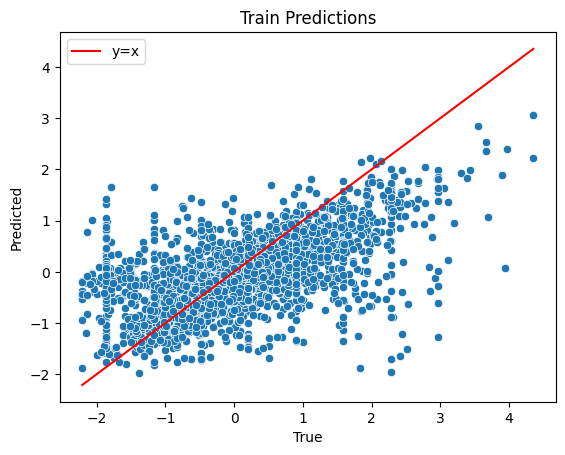

In [15]:
# Show Train vs Train Predictions
y_pred_train = model.predict(X_train)
mse = np.mean((y_train - y_pred_train.flatten())**2)
print(f"Train Mean Squared Error: {mse}")



# Plot the predictions
sns.scatterplot(x=y_train, y=y_pred_train.flatten())
x = np.linspace(np.min(y_train), np.max(y_train), 100)
plt.plot(x, x, '-r', label='y=x')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Train Predictions")
plt.legend(loc='best')
plt.show()

28/28 [==============================] - 0s 5ms/step
Test Mean Squared Error: 0.6844558251264051


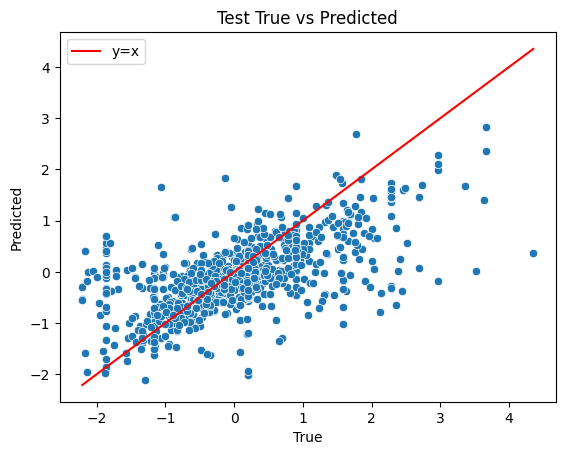

In [16]:
# Predict
y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")



# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test True vs Predicted')
plt.legend(loc='upper left')
plt.show()

The model does pretty well on the test set. We can see a decent fit despite heavy noise.

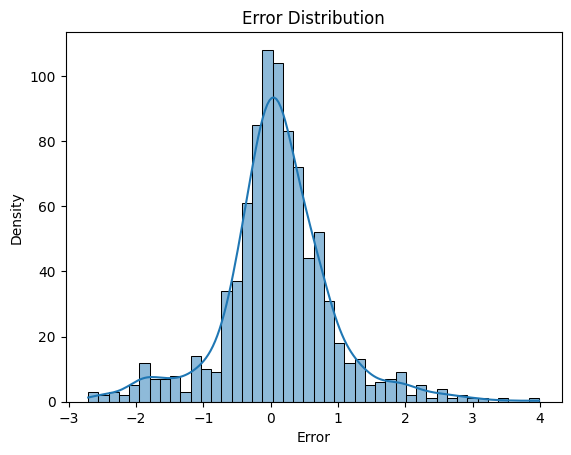

In [17]:
# Visualize the error
sns.histplot(y_test - y_pred.flatten(), kde=True)
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.show()

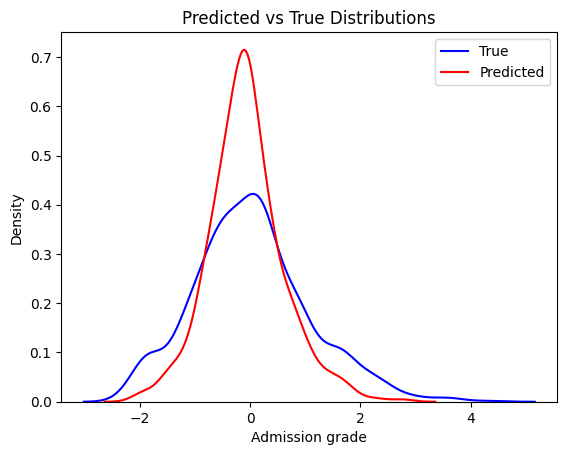

In [18]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

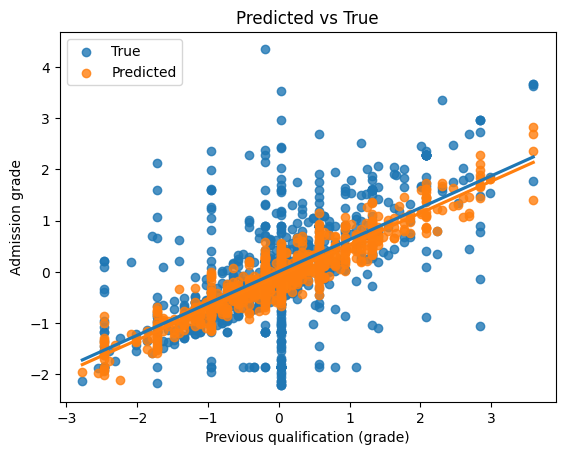

In [19]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('Predicted vs True')
plt.legend()
plt.show()

There is much less noise in the predictions, as we might expect. but the model seems to miss the central trend.

## SVM

In [20]:
# Create svm
from sklearn.svm import SVR
from tqdm import tqdm


# Hyperparameters
c_vals = [0.1, 1, 5, 10]
epsilons = [0.1, 0.01, 0.001, 0.0001]
kernel = ['linear', 'rbf', 'poly']
errors = []
best_params = None
best_error = np.inf

# Grid search to find best params
# SVMs are so fast that we can afford to do a grid search
for k in tqdm(kernel):
    for c in tqdm(c_vals):
        for epsilon in tqdm(epsilons):
            svr = SVR(C=c, epsilon=epsilon, kernel=k)
            svr.fit(X_train, y_train)
            error = np.mean((y_test - svr.predict(X_test))**2)
            errors.append(error)
            if error < best_error:
                best_error = error
                best_params = (c, epsilon, k)

# Print best params
print(f"Best params: {best_params}")


  0%|          | 0/3 [00:00<?, ?it/s]




100%|██████████| 4/4 [00:02<00:00,  1.76it/s]





100%|██████████| 4/4 [00:06<00:00,  1.73s/it]





100%|██████████| 4/4 [00:23<00:00,  5.85s/it]





 33%|███▎      | 1/3 [01:15<02:31, 75.92s/it]




100%|██████████| 4/4 [00:03<00:00,  1.15it/s]





100%|██████████| 4/4 [00:03<00:00,  1.09it/s]





100%|██████████| 4/4 [00:04<00:00,  1.24s/it]





 67%|██████▋   | 2/3 [01:34<00:42, 42.12s/it]




100%|██████████| 4/4 [00:01<00:00,  2.28it/s]





100%|██████████| 4/4 [00:02<00:00,  1.70it/s]





100%|██████████| 4/4 [00:04<00:00,  1.16s/it]





100%|██████████| 3/3 [01:49<00:00, 36.63s/it]

Best params: (1, 0.0001, 'rbf')


In [21]:
# Create the model
svr = SVR(C=best_params[0], epsilon=best_params[1], kernel=best_params[2])

# Fit the model
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6364483238334159


Test Mean Squared Error: 0.6364483238334159


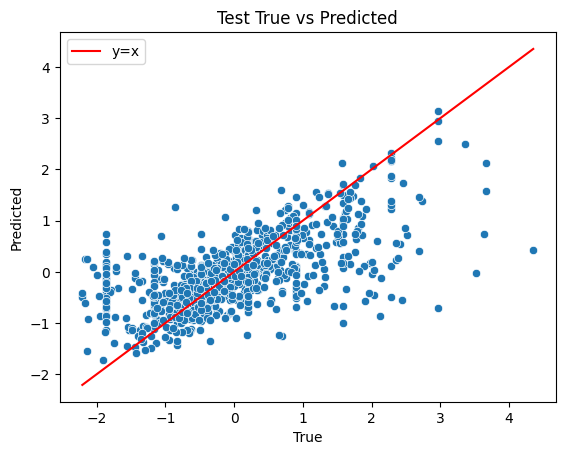

In [22]:
# Predict

mse = np.mean((y_test - y_pred.flatten())**2)
print(f"Test Mean Squared Error: {mse}")

# Plot the predictions
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a line
x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, '-r', label='y=x')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test True vs Predicted')
plt.legend(loc='upper left')
plt.show()

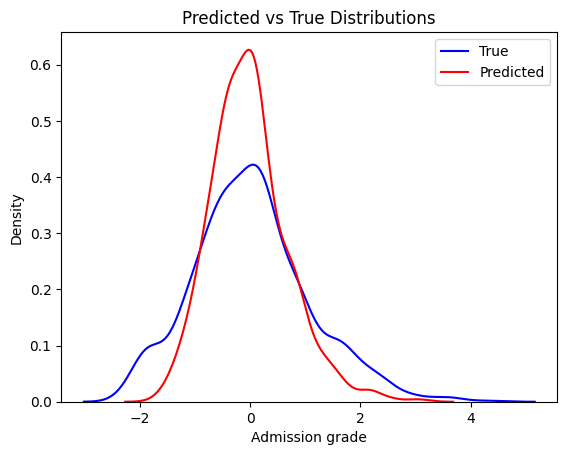

In [23]:
# Plot predictions distribution vs true
sns.kdeplot(y_test, label='True', color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', color='red')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.title('Predicted vs True Distributions')
plt.legend()
plt.show()

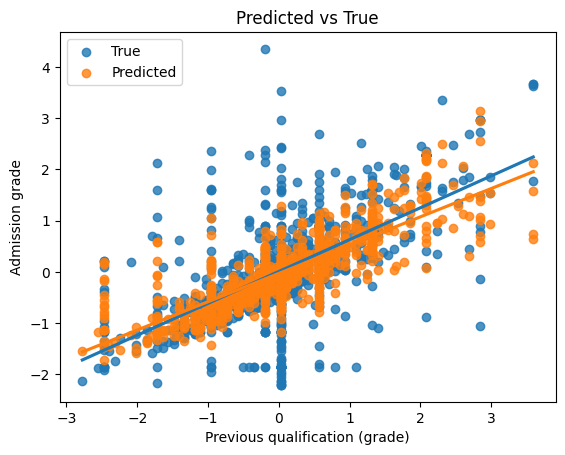

In [24]:
# Plot predicted vs true on a scatter plot
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_test, label='True', ci=None)
sns.regplot(x=X_test["Previous qualification (grade)"], y=y_pred.flatten(), label='Predicted', ci=None)
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')
plt.title('Predicted vs True')
plt.legend()
plt.show()

## Comparison

This actually  outperforms the deep learning model. We see a  better fit t the data and a lower MSE (0.68 vs 0.63), demonstrating the power of SVMs for this type of data. However, due to the nature of deep learning, it is likely with more extensive tuning, the deep learning model could outperform the SVM as Neural Networks are known to be universal function approximators.